In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [2]:
df=pd.read_csv('results.csv')
df=df.drop(df.columns[0], axis=1)
df.head()

,array_time,column_count,element_count,pandas_df_compute,pandas_df_time,spark_df_compute,spark_df_time
0,0.000019,1,1000,0.003591,0.000060,0.161129,0.034196
1,0.000027,2,1000,0.007353,0.000089,0.201386,0.024554
2,0.000036,4,1000,0.014240,0.000096,0.270248,0.037234
3,0.000029,5,1000,0.018164,0.000105,0.322154,0.031028
4,0.000030,10,1000,0.020943,0.000098,0.419448,0.026436


In [3]:
df['row_count']=df['element_count']/df['column_count']
df.sort_values(by=['row_count', 'column_count'])

,array_time,column_count,element_count,pandas_df_compute,pandas_df_time,spark_df_compute,spark_df_time,row_count
4,0.000030,10,1000,0.020943,0.000098,0.419448,0.026436,100.0
3,0.000029,5,1000,0.018164,0.000105,0.322154,0.031028,200.0
2,0.000036,4,1000,0.014240,0.000096,0.270248,0.037234,250.0
1,0.000027,2,1000,0.007353,0.000089,0.201386,0.024554,500.0
0,0.000019,1,1000,0.003591,0.000060,0.161129,0.034196,1000.0
9,0.001494,10,100000,0.029632,0.000090,0.356623,0.644481,10000.0
8,0.001335,5,100000,0.017105,0.000100,0.261028,0.743883,20000.0
7,0.001341,4,100000,0.019409,0.000090,0.214906,0.786448,25000.0
6,0.001410,2,100000,0.010090,0.000095,0.198807,1.061702,50000.0
5,0.001358,1,100000,0.012597,0.000119,0.245508,1.613822,100000.0


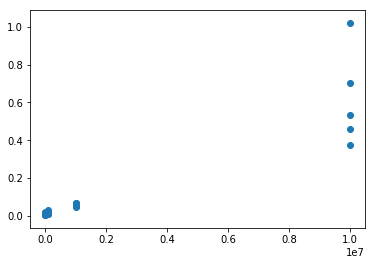

In [4]:
plt.scatter(x=df['element_count'], 
            y=df['pandas_df_compute'])

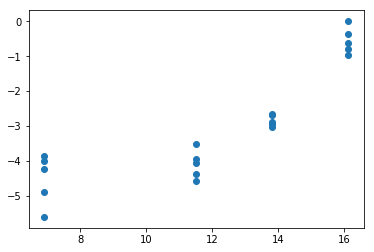

In [5]:
plt.scatter(x=np.log(df['element_count']), 
            y=np.log(df['pandas_df_compute']))

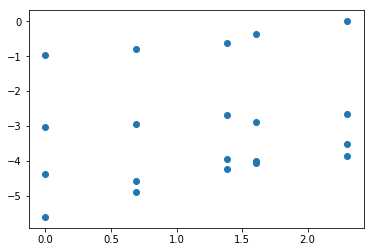

In [6]:
plt.scatter(x=np.log(df['column_count']), 
            y=np.log(df['pandas_df_compute']))

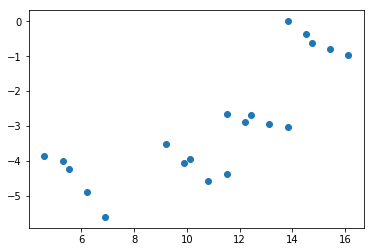

In [7]:
plt.scatter(x=np.log(df['row_count']), 
            y=np.log(df['pandas_df_compute']))

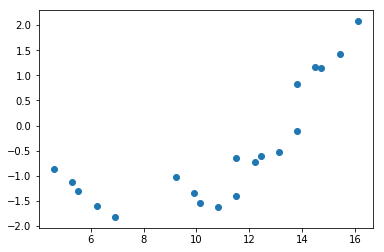

In [8]:
plt.scatter(x=np.log(df['row_count']), 
            y=np.log(df['spark_df_compute']))

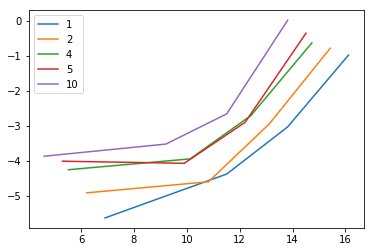

In [9]:
for each_column_ct in df['column_count'].unique(): 
    sub_df=df[df['column_count']==each_column_ct]
    plt.plot(np.log(sub_df['row_count']), 
             np.log(sub_df['pandas_df_compute']), label=each_column_ct)
plt.legend()

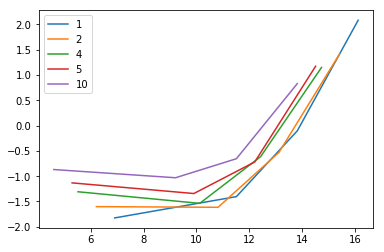

In [10]:
for each_column_ct in df['column_count'].unique(): 
    sub_df=df[df['column_count']==each_column_ct]
    plt.plot(np.log(sub_df['row_count']), 
             np.log(sub_df['spark_df_compute']), label=each_column_ct)
plt.legend()

<IPython.core.display.Javascript object>


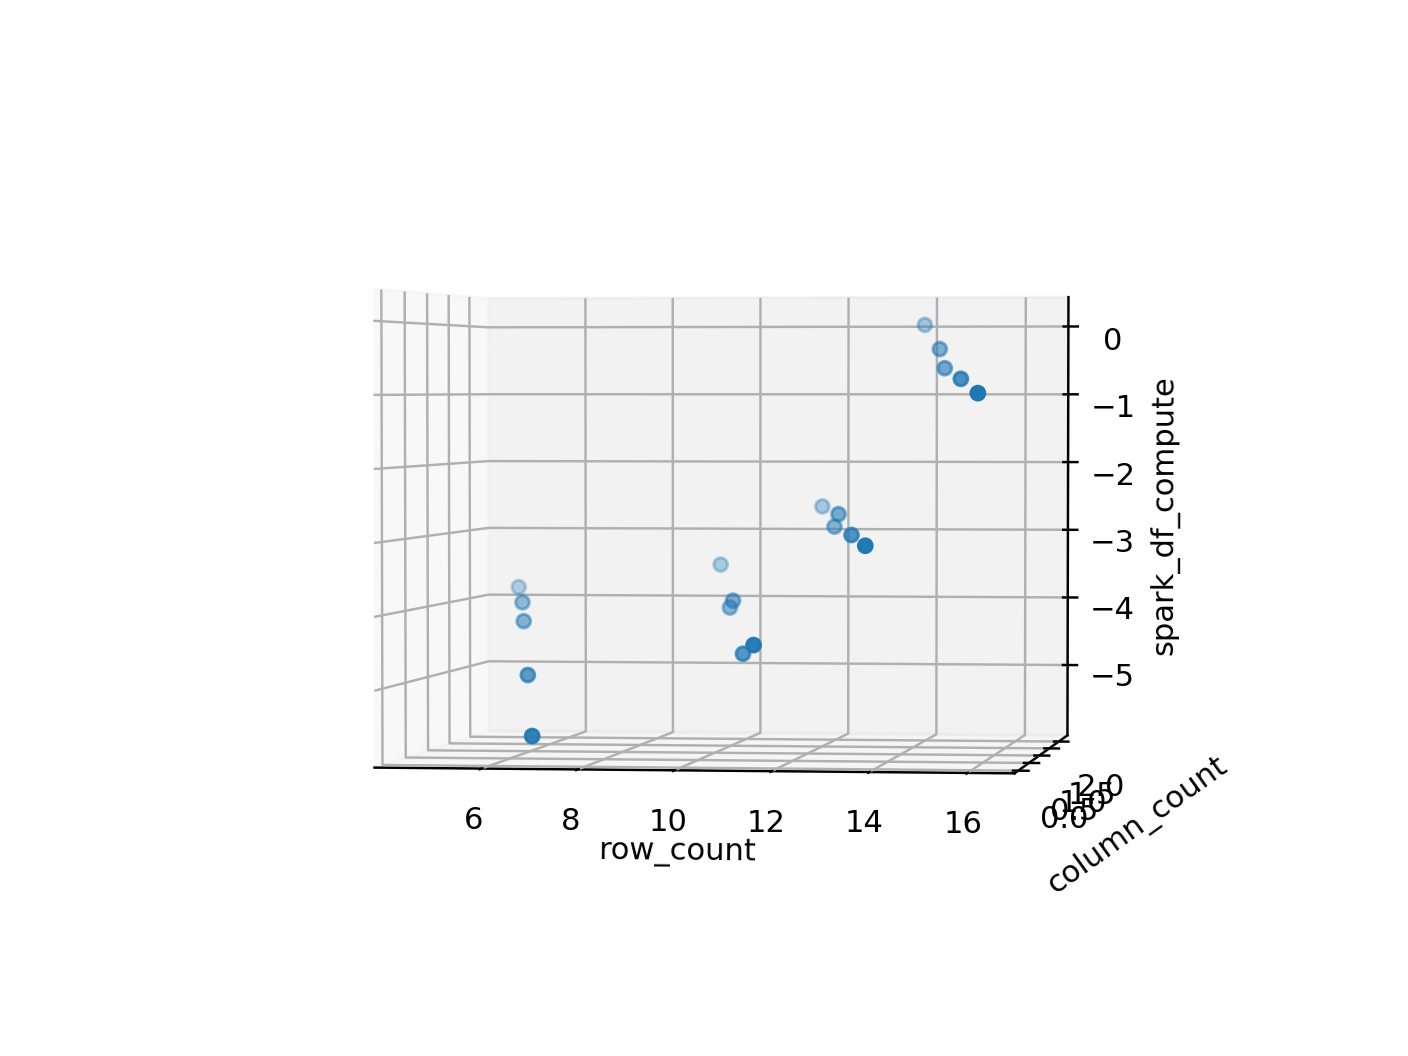

Text(0.5, 0, 'spark_df_compute')

In [39]:
%matplotlib notebook

fig=plt.figure()
ax=plt.axes(projection='3d')
ax.scatter3D(np.log(df['row_count']),
             np.log(df['column_count']), 
             np.log(df['pandas_df_compute']))
# ax.scatter3D(df['row_count'],
#              df['column_count'], 
#              df['pandas_df_compute'])
ax.set_xlabel('row_count')
ax.set_ylabel('column_count')
ax.set_zlabel('spark_df_compute')
# plt.show()

In [109]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly=PolynomialFeatures(degree=2)
x=np.log(df[['row_count', 'column_count']])
y=np.log(df['pandas_df_compute'])
poly.fit(x)
transformed_x=poly.transform(x)

lr_poly=LinearRegression()
lr_poly.fit(transformed_x, y)
display(lr_poly.score(transformed_x, y))

lr=LinearRegression()
lr.fit(x, y)
display(lr.score(x, y))
# display(lr.coef_)

results_poly=lr_poly.predict(transformed_x)
results_lr=lr.predict(x)
results_df=pd.DataFrame({'y': y, 
                         'results_lr': results_lr, 
                         'diff_lr': results-y, 
                         'results_poly': results_poly, 
                         'diff_poly': results_poly-y})
# results_df

0.9867029430258414

0.7818039443203629

In [196]:
df['row_count'].unique().min()

100.0

In [197]:
np.log(100)

4.605170185988092

In [198]:
# x_1=np.log(df['row_count'])
all_row_counts=df['row_count'].unique()
all_column_counts=df['column_count'].unique()
planes_count=10
# x_1=np.arange(4, 16, 2)
x_1=np.linspace(np.log(all_row_counts.min()), np.log(all_row_counts.max()), planes_count)
# x_2=np.log(df['column_count'])
# x_2=np.arange(0, 2.5, .5)
x_2=np.linspace(np.log(all_column_counts.min()), np.log(all_column_counts.max()), planes_count)
X_1, X_2=np.meshgrid(x_1, x_2)
r1, r2=X_1.flatten(), X_2.flatten()
r1, r2=r1.reshape(-1, 1), r2.reshape(-1, 1)
grid=np.hstack([r1, r2])

# z=lr.predict(grid)
transformed_grid=poly.transform(grid)
z=lr_poly.predict(transformed_grid)

<IPython.core.display.Javascript object>


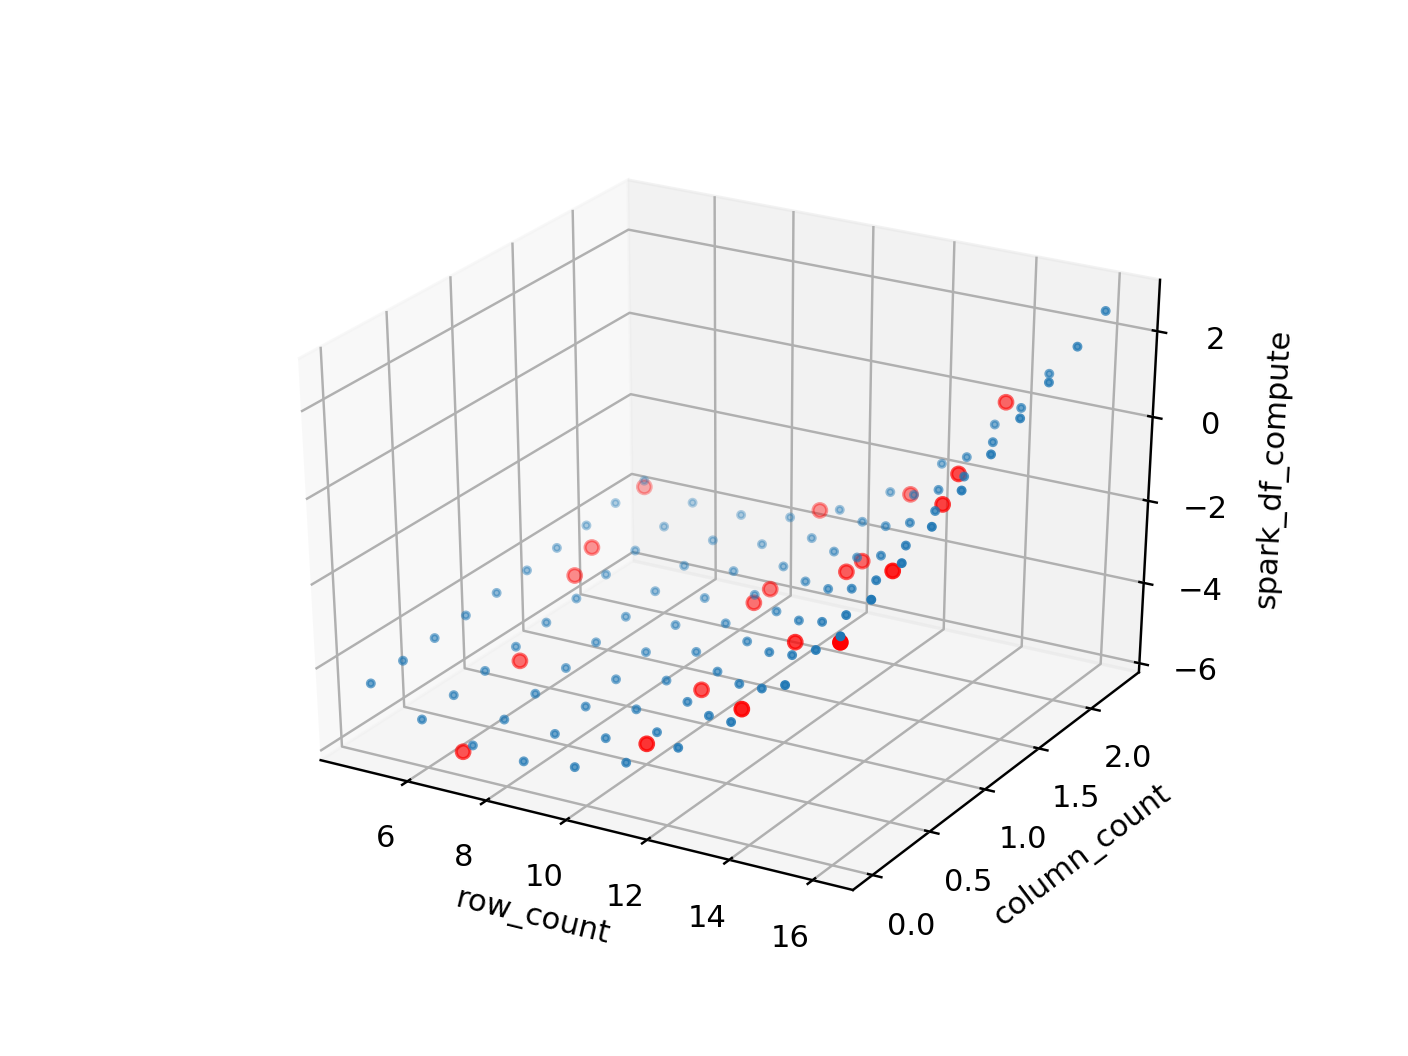

Text(0.5, 0, 'spark_df_compute')

In [199]:
%matplotlib notebook

fig=plt.figure()
ax=plt.axes(projection='3d')
ax.scatter3D(r1,
             r2, 
             z, 
             s=5)
ax.scatter3D(np.log(df['row_count']),
             np.log(df['column_count']), 
             np.log(df['pandas_df_compute']), 
             c='red')
# ax.scatter3D(df['row_count'],
#              df['column_count'], 
#              df['pandas_df_compute'])
ax.set_xlabel('row_count')
ax.set_ylabel('column_count')
ax.set_zlabel('spark_df_compute')
# plt.show()

<IPython.core.display.Javascript object>


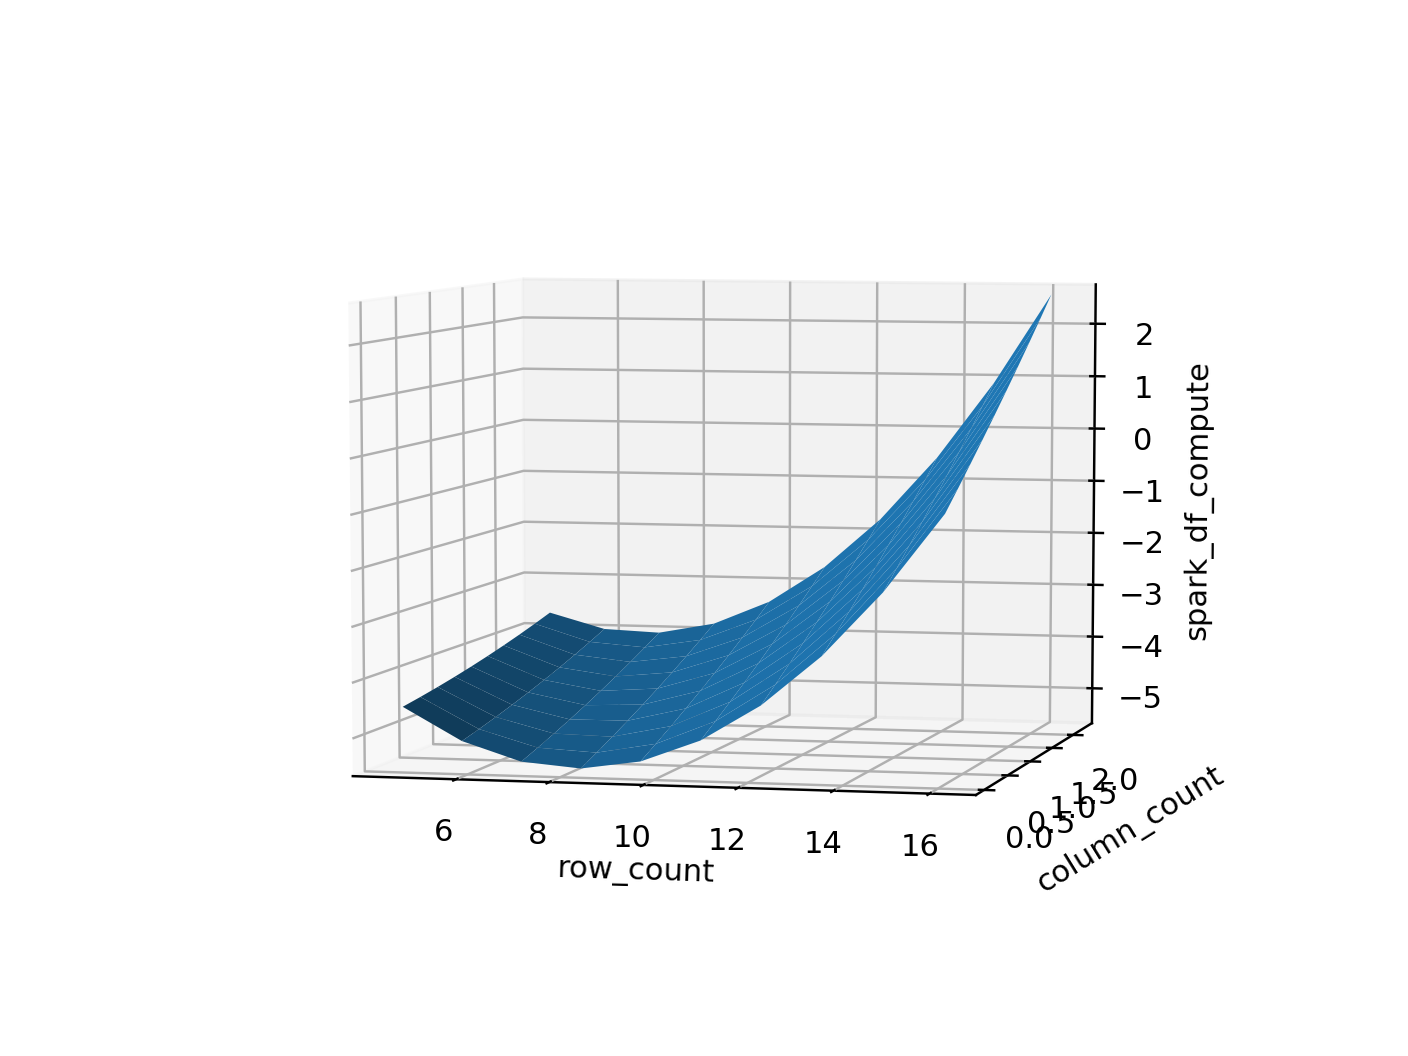

Text(0.5, 0, 'spark_df_compute')

In [201]:

%matplotlib notebook

Z=z.reshape(-1, planes_count)
fig=plt.figure()
ax=plt.axes(projection='3d')
ax.plot_surface(X_1,
             X_2, 
             Z)
# ax.scatter3D(df['row_count'],
#              df['column_count'], 
#              df['pandas_df_compute'])
ax.set_xlabel('row_count')
ax.set_ylabel('column_count')
ax.set_zlabel('spark_df_compute')
# plt.show()

### Examples from Matplotlib

<IPython.core.display.Javascript object>


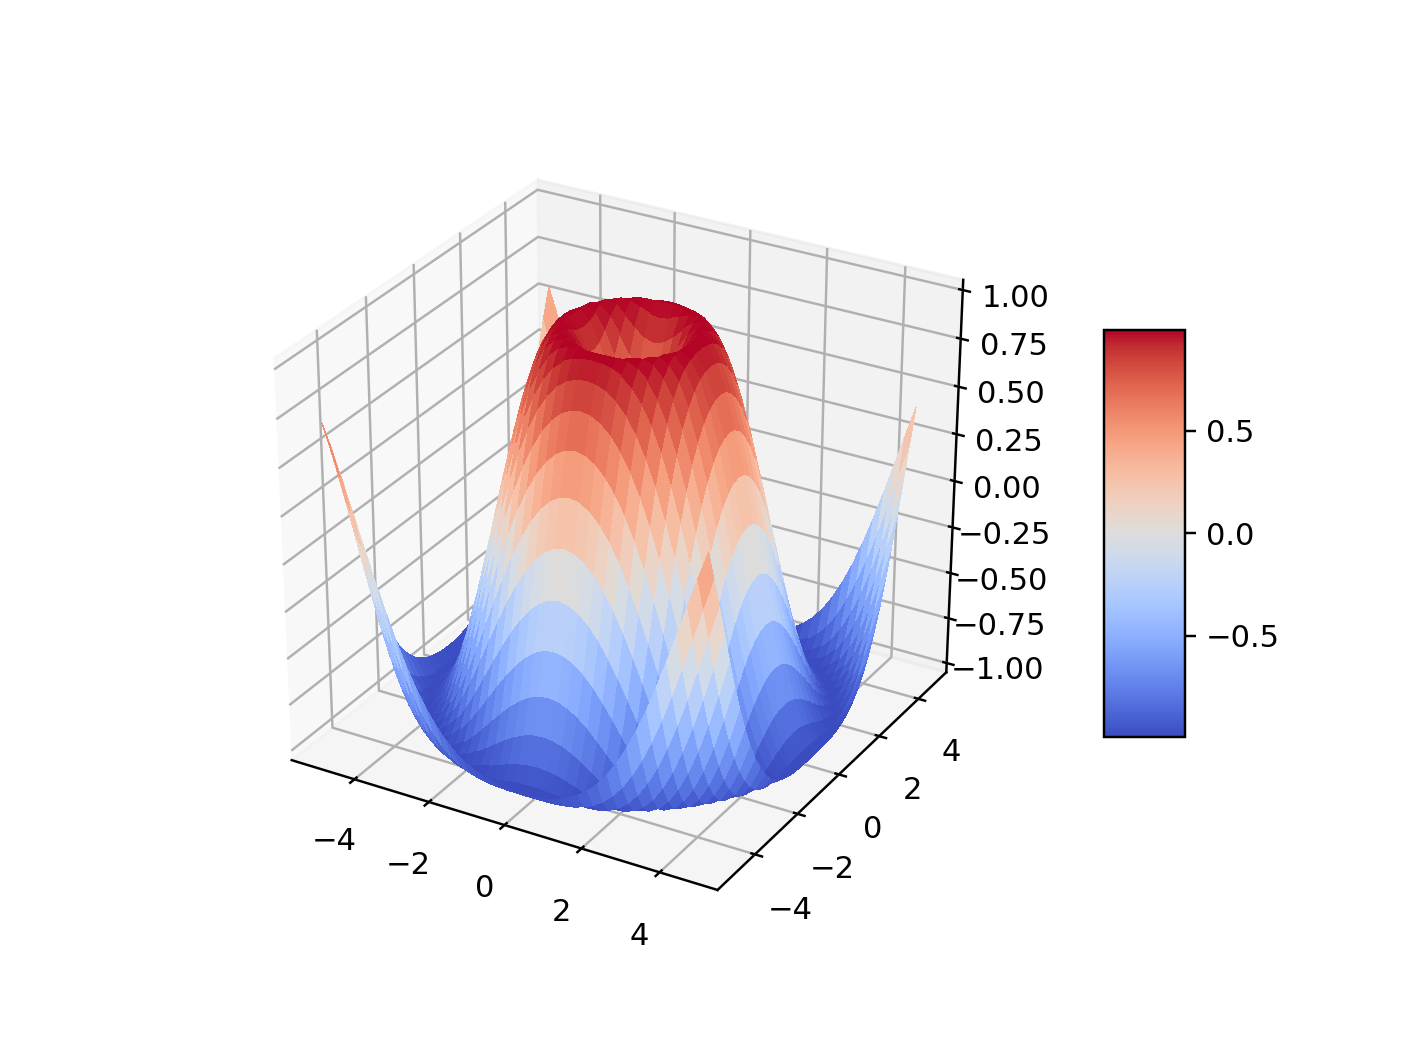

In [146]:
%matplotlib notebook

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
# ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
# ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [151]:
X.shape, Y.shape, Z.shape

((40, 40), (40, 40), (40, 40))

In [192]:
np.uniform(1, 10)

AttributeError: module 'numpy' has no attribute 'uniform'